In [14]:
from qiskit import *
from qiskit.quantum_info import Operator, average_gate_fidelity
from numpy import pi
import numpy as np
simulator = Aer.get_backend('qasm_simulator')

Рассмотрим состояние $ | \psi \rangle = a_{00}|00\rangle+a_{01}|01\rangle+a_{10}|10\rangle+a_{11}|11\rangle$

In [15]:
#(a)
#a00=1/np.sqrt(2)
#a01=0
#a10=0
#a11=1/np.sqrt(2)

#(b)
#a00=0
#a01=1/np.sqrt(2)
#a10=1/np.sqrt(2)
#a11=0

#(c)
a00=3/np.sqrt(12)
a01=1/np.sqrt(12)
a10=1/np.sqrt(12)
a11=-1/np.sqrt(12)

Его можно представить в виде разложения $ | \psi \rangle =  |0\rangle\otimes | \phi_1 \rangle + |1\rangle\otimes | \phi_2 \rangle$, где $|\phi_1\rangle=a_{00}|0\rangle+a_{01}|1\rangle$ и $|\phi_2\rangle=a_{10}|0\rangle+a_{11}|1\rangle$. При этом определены следующие скалярные произведения:

$ \langle \phi_1| \phi_2 \rangle=a_{00}^*a_{10}+a_{11}a_{01}^*$,  $ \langle \phi_1| \phi_1 \rangle=|a_{00}|^2+|a_{01}|^2$,  $ \langle \phi_2| \phi_2 \rangle=|a_{10}|^2+|a_{11}|^2$ (далее мы предполагаем числа действительными, так как таковыми они являются в задании).

In [16]:
sc_21=a00*a10+a11*a01
sc_11=a00**2+a01**2
sc_22=a10**2+a11**2

Введем унитарную матрицу
\begin{equation}
U=
\begin{pmatrix} 
u& -v^*\\
v & u^*\\
\end{pmatrix}    
\end{equation}

И подействуем ей на первый кубит введенного разложения 
$ | \psi \rangle =  (u|0\rangle+v|1\rangle)\otimes | \phi_1 \rangle + (-v^*|0\rangle+u^*|1\rangle)\otimes | \phi_2 \rangle=|0\rangle(u| \phi_1 \rangle-v^*| \phi_2 \rangle)+|1\rangle(v| \phi_1 \rangle+u^*| \phi_2 \rangle)$

Потребуем ортогональность вектров $e_1 \cdot e_2 =(u^*| \phi_1 \rangle-v| \phi_2 \rangle) ^{T}\cdot (v| \phi_1 \rangle+u^*| \phi_2 \rangle)=\delta_{e_1,e_2} = u^{*2} \langle \phi_1| \phi_2\rangle - v^{2} \langle \phi_2| \phi_1\rangle +u^* v  (\langle \phi_1| \phi_1\rangle-\langle \phi_2| \phi_2\rangle) $

$f^{2} \langle \phi_1| \phi_2\rangle -  \langle \phi_2| \phi_1\rangle +f  (\langle \phi_1| \phi_1\rangle-\langle \phi_2| \phi_2\rangle)=0 $, $f=u^*/v$:

In [17]:
a = sc_21
b = sc_11-sc_22
c = - sc_21
print(a)
print(b)
print(c)
if a!=0:
    discriminant = b**2 - 4*a*c
    f1 = (-b + discriminant ** 0.5) / (2 * a)
    f2 = (-b - discriminant ** 0.5) / (2 * a)
    print(f2,f1)   

0.16666666666666669
0.6666666666666667
-0.16666666666666669
-4.23606797749979 0.23606797749978978


Учтем унитарность введенной матрицы $u^2+v^2=1$

In [18]:
if a!=0:
    v1=np.sqrt(1/(1+f1**2))
    print(v1)
    u1=np.sqrt(1-v1**2)
    print(u1)
    print(u1**2+v1**2)

0.9732489894677302
0.2297529205473611
1.0


Мы можем нормировать введенные вектора $e'_1=e_1/l,~e'_2=e_2/m$, тогда они связаны с исходным базисом унитарным преобразованием

$e'_1=V | 0 \rangle$, $e'_2=V | 1 \rangle$


\begin{equation}
V=
\begin{pmatrix} 
v11& v12\\
v21 & v22\\
\end{pmatrix}    
\end{equation}


$e_1=u| \phi_1 \rangle-v^*| \phi_2 \rangle$

$e_2 =v| \phi_1 \rangle+u^*| \phi_2 \rangle$

$|\phi_1\rangle=a_{00}|0\rangle+a_{01}|1\rangle$ и $|\phi_2\rangle=a_{10}|0\rangle+a_{11}|1\rangle$

\begin{equation}
V=
\begin{pmatrix} 
(u a_{00} -v^* a_{10})/l & (v a_{00} +u^* a_{10})/m \\
(u a_{01} -v^* a_{11})/l&  (v a_{01} +u^* a_{11})/m \\
\end{pmatrix},
\end{equation}

$l=\sqrt{(u a_{00} -v^* a_{10})^2+(u a_{01} -v^* a_{11})^2}$;

$m=\sqrt{(v a_{00} +u^* a_{10})^2+(v a_{01} +u^* a_{11})^2}$.


Если а=0, что верно для данных примеров, что матрица $U=I$. 

In [8]:
if a!=0:
    l=np.sqrt((u1*a00-v1*a10)**2+(u1*a01-v1*a11)**2)
    m=np.sqrt((v1*a00+u1*a10)**2+(v1*a01+u1*a11)**2)
    print(l)
    print(m)
    w_op = Operator([[l, -m],[m,l]])
    u_op_tr = Operator([[u1, v1],[-v1,u1]])
    v_op_tr = Operator([[(u1*a00-v1*a10)/l,(v1*a00+u1*a10)/m],[ (u1*a01-v1*a11)/l, (v1*a01+u1*a11)/m]])
    print(w_op)
    print(u_op_tr)
    print(v_op_tr)
if a==0:
    u1=1
    v1=0
    l=np.sqrt((u1*a00-v1*a10)**2+(u1*a01-v1*a11)**2)
    m=np.sqrt((v1*a00+u1*a10)**2+(v1*a01+u1*a11)**2)
    print(l)
    print(m)
    w_op = Operator([[l, -m],[m,l]])
    u_op_tr = Operator([[u1, v1],[-v1,u1]])
    v_op_tr = Operator([[(u1*a00-v1*a10)/l,(v1*a00+u1*a10)/m],[ (u1*a01-v1*a11)/l, (v1*a01+u1*a11)/m]])
    print(w_op)
    print(u_op_tr)
    print(v_op_tr)

0.35682208977309
0.9341723589627158
Operator([[ 0.35682209+0.j, -0.93417236+0.j],
          [ 0.93417236+0.j,  0.35682209+0.j]],
         input_dims=(2,), output_dims=(2,))
Operator([[ 0.22975292+0.j,  0.97324899+0.j],
          [-0.97324899+0.j,  0.22975292+0.j]],
         input_dims=(2,), output_dims=(2,))
Operator([[-0.22975292+0.j,  0.97324899+0.j],
          [ 0.97324899+0.j,  0.22975292+0.j]],
         input_dims=(2,), output_dims=(2,))


Далее мы применяем операторы в последовательности

$|\psi\rangle=\left(\mathbf{u}^{\dagger} \otimes \mathbf{v}\right)(l|0\rangle \otimes|0\rangle+m|1\rangle \otimes|1\rangle)$

$|\psi\rangle=\left(\mathbf{u}^{\dagger} \otimes \mathbf{v}\right) \mathbf{C}_{10}(\mathbf{w} \otimes \mathbf{1})(|0\rangle \otimes|0\rangle)$

In [9]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.unitary(w_op,[0], label='W')
circuit.cx(qreg_q[0], qreg_q[1])
circuit.unitary(u_op_tr,[0], label='UT')
circuit.unitary(v_op_tr,[1], label='V')
circuit.measure(qreg_q,creg_c)
circuit.draw()

┌───┐     ┌────┐┌─┐   
q_0: ─|0>─┤ W ├──■──┤ UT ├┤M├───
          └───┘┌─┴─┐├───┬┘└╥┘┌─┐
q_1: ─|0>──────┤ X ├┤ V ├──╫─┤M├
               └───┘└───┘  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

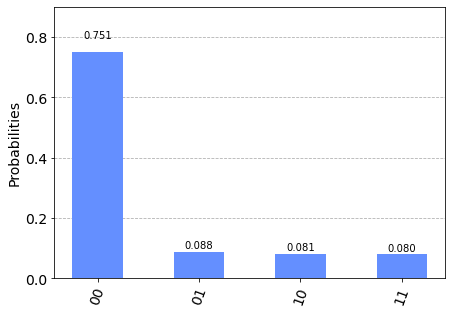

In [11]:
result = execute(circuit, backend = simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

Применим алгоритм к подпунктам (а) и (б) задания.

0.0
0.0
-0.0
0.7071067811865475
0.7071067811865475
Operator([[ 0.70710678+0.j, -0.70710678+0.j],
          [ 0.70710678+0.j,  0.70710678+0.j]],
         input_dims=(2,), output_dims=(2,))
Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j]],
         input_dims=(2,), output_dims=(2,))
Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j]],
         input_dims=(2,), output_dims=(2,))


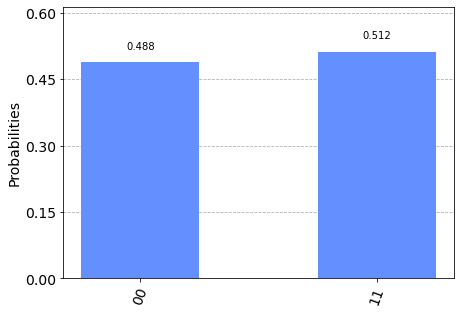

In [12]:
#(a)
a00=1/np.sqrt(2)
a01=0
a10=0
a11=1/np.sqrt(2)

#(b)
#a00=0
#a01=1/np.sqrt(2)
#a10=1/np.sqrt(2)
#a11=0

sc_21=a00*a10+a11*a01
sc_11=a00**2+a01**2
sc_22=a10**2+a11**2

a = sc_21
b = sc_11-sc_22
c = - sc_21
print(a)
print(b)
print(c)
if a!=0:
    discriminant = b**2 - 4*a*c
    f1 = (-b + discriminant ** 0.5) / (2 * a)
    f2 = (-b - discriminant ** 0.5) / (2 * a)
    print(f2,f1)  
    
if a!=0:
    v1=np.sqrt(1/(1+f1**2))
    print(v1)
    u1=np.sqrt(1-v1**2)
    print(u1)
    print(u1**2+v1**2)
if a!=0:
    l=np.sqrt((u1*a00-v1*a10)**2+(u1*a01-v1*a11)**2)
    m=np.sqrt((v1*a00+u1*a10)**2+(v1*a01+u1*a11)**2)
    print(l)
    print(m)
    w_op = Operator([[l, -m],[m,l]])
    u_op_tr = Operator([[u1, v1],[-v1,u1]])
    v_op_tr = Operator([[(u1*a00-v1*a10)/l,(v1*a00+u1*a10)/m],[ (u1*a01-v1*a11)/l, (v1*a01+u1*a11)/m]])
    print(w_op)
    print(u_op_tr)
    print(v_op_tr)
if a==0:
    u1=1
    v1=0
    l=np.sqrt((u1*a00-v1*a10)**2+(u1*a01-v1*a11)**2)
    m=np.sqrt((v1*a00+u1*a10)**2+(v1*a01+u1*a11)**2)
    print(l)
    print(m)
    w_op = Operator([[l, -m],[m,l]])
    u_op_tr = Operator([[u1, v1],[-v1,u1]])
    v_op_tr = Operator([[(u1*a00-v1*a10)/l,(v1*a00+u1*a10)/m],[ (u1*a01-v1*a11)/l, (v1*a01+u1*a11)/m]])
    print(w_op)
    print(u_op_tr)
    print(v_op_tr)
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.unitary(w_op,[0], label='W')
circuit.cx(qreg_q[0], qreg_q[1])
circuit.unitary(u_op_tr,[0], label='UT')
circuit.unitary(v_op_tr,[1], label='V')
circuit.measure(qreg_q,creg_c)
circuit.draw()

result = execute(circuit, backend = simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

0.0
0.0
-0.0
0.7071067811865475
0.7071067811865475
Operator([[ 0.70710678+0.j, -0.70710678+0.j],
          [ 0.70710678+0.j,  0.70710678+0.j]],
         input_dims=(2,), output_dims=(2,))
Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j]],
         input_dims=(2,), output_dims=(2,))
Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


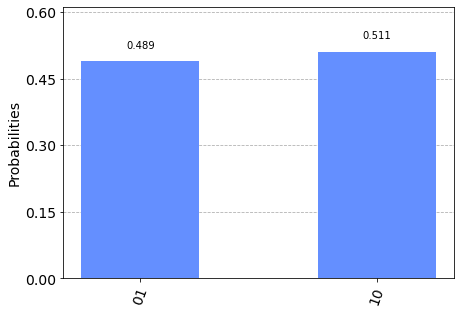

In [13]:
#(a)
#a00=1/np.sqrt(2)
#a01=0
#a10=0
#a11=1/np.sqrt(2)

#(b)
a00=0
a01=1/np.sqrt(2)
a10=1/np.sqrt(2)
a11=0

sc_21=a00*a10+a11*a01
sc_11=a00**2+a01**2
sc_22=a10**2+a11**2

a = sc_21
b = sc_11-sc_22
c = - sc_21
print(a)
print(b)
print(c)
if a!=0:
    discriminant = b**2 - 4*a*c
    f1 = (-b + discriminant ** 0.5) / (2 * a)
    f2 = (-b - discriminant ** 0.5) / (2 * a)
    print(f2,f1)  
    
if a!=0:
    v1=np.sqrt(1/(1+f1**2))
    print(v1)
    u1=np.sqrt(1-v1**2)
    print(u1)
    print(u1**2+v1**2)
if a!=0:
    l=np.sqrt((u1*a00-v1*a10)**2+(u1*a01-v1*a11)**2)
    m=np.sqrt((v1*a00+u1*a10)**2+(v1*a01+u1*a11)**2)
    print(l)
    print(m)
    w_op = Operator([[l, -m],[m,l]])
    u_op_tr = Operator([[u1, v1],[-v1,u1]])
    v_op_tr = Operator([[(u1*a00-v1*a10)/l,(v1*a00+u1*a10)/m],[ (u1*a01-v1*a11)/l, (v1*a01+u1*a11)/m]])
    print(w_op)
    print(u_op_tr)
    print(v_op_tr)
if a==0:
    u1=1
    v1=0
    l=np.sqrt((u1*a00-v1*a10)**2+(u1*a01-v1*a11)**2)
    m=np.sqrt((v1*a00+u1*a10)**2+(v1*a01+u1*a11)**2)
    print(l)
    print(m)
    w_op = Operator([[l, -m],[m,l]])
    u_op_tr = Operator([[u1, v1],[-v1,u1]])
    v_op_tr = Operator([[(u1*a00-v1*a10)/l,(v1*a00+u1*a10)/m],[ (u1*a01-v1*a11)/l, (v1*a01+u1*a11)/m]])
    print(w_op)
    print(u_op_tr)
    print(v_op_tr)
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.unitary(w_op,[0], label='W')
circuit.cx(qreg_q[0], qreg_q[1])
circuit.unitary(u_op_tr,[0], label='UT')
circuit.unitary(v_op_tr,[1], label='V')
circuit.measure(qreg_q,creg_c)
circuit.draw()

result = execute(circuit, backend = simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))